# **Digirise Infolabs - ML & Data Science Internship**

# **Beginner Level  :**
# **TASK 2 - BIGMART SALES PREDICTION**

### Author : TANAY CHOUBEY
[![alt text](https://logoeps.com/wp-content/uploads/2014/02/25231-github-cat-in-a-circle-icon-vector-icon-vector-eps.png "Git Hub Link")](https://github.com/Tanay-Choubey)

#### Problem Statement: Develop a machine learning model that can accurately predict the sales of various products in BigMart stores based on historical sales data and other relevant attributes such as the type and size of the outlet, location and visibility. The goal is to use this model to identify key factors that influence sales and to make recommendations for improving sales and profitability. The dataset contains information on various products sold across different outlets and their sales performance over a period of time.

#### Dataset link :- https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data/data

### Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the both dataset

In [ ]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [ ]:
test_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [ ]:
test_data.shape

(5681, 11)

In [ ]:
train_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
train_data.shape

(8523, 12)

In [ ]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Concatinating both dataset

In [ ]:
data = pd.concat([train_data, test_data], axis=0)

In [ ]:
data.shape

(14204, 12)

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

We can see that there are some null values in the dataset.

### Droping null values

In [ ]:
data = data.dropna(subset=['Item_Weight','Outlet_Size','Item_Outlet_Sales'])

In [ ]:
data_itemwt = data.Item_Weight.value_counts().reset_index().rename(columns = {'index':'Item_Weight', 'Item_Weight':'Number_Of_Items'})
data_itemwt_sorted = data_itemwt.sort_values(by='Number_Of_Items', ascending=False).head(20).reset_index(drop=True)
data_itemwt_sorted

,Item_Weight,Number_Of_Items
0,12.150,58
1,17.600,55
2,13.650,49
3,11.800,49
4,16.000,45
5,15.100,44
6,10.500,44
7,20.700,44
8,9.300,42
9,18.850,42


### Data Visualization

In [ ]:
item_type_count = data.groupby('Item_Type').count()['Item_Identifier'].reset_index().rename(columns={'Item_Identifier':'Number_Of_Items'}).sort_values(by='Number_Of_Items',ascending=False)
item_type_count

,Item_Type,Number_Of_Items
6,Fruits and Vegetables,670
13,Snack Foods,656
9,Household,498
5,Frozen Foods,477
4,Dairy,380
3,Canned,361
0,Baking Goods,351
8,Health and Hygiene,277
14,Soft Drinks,241
10,Meat,221


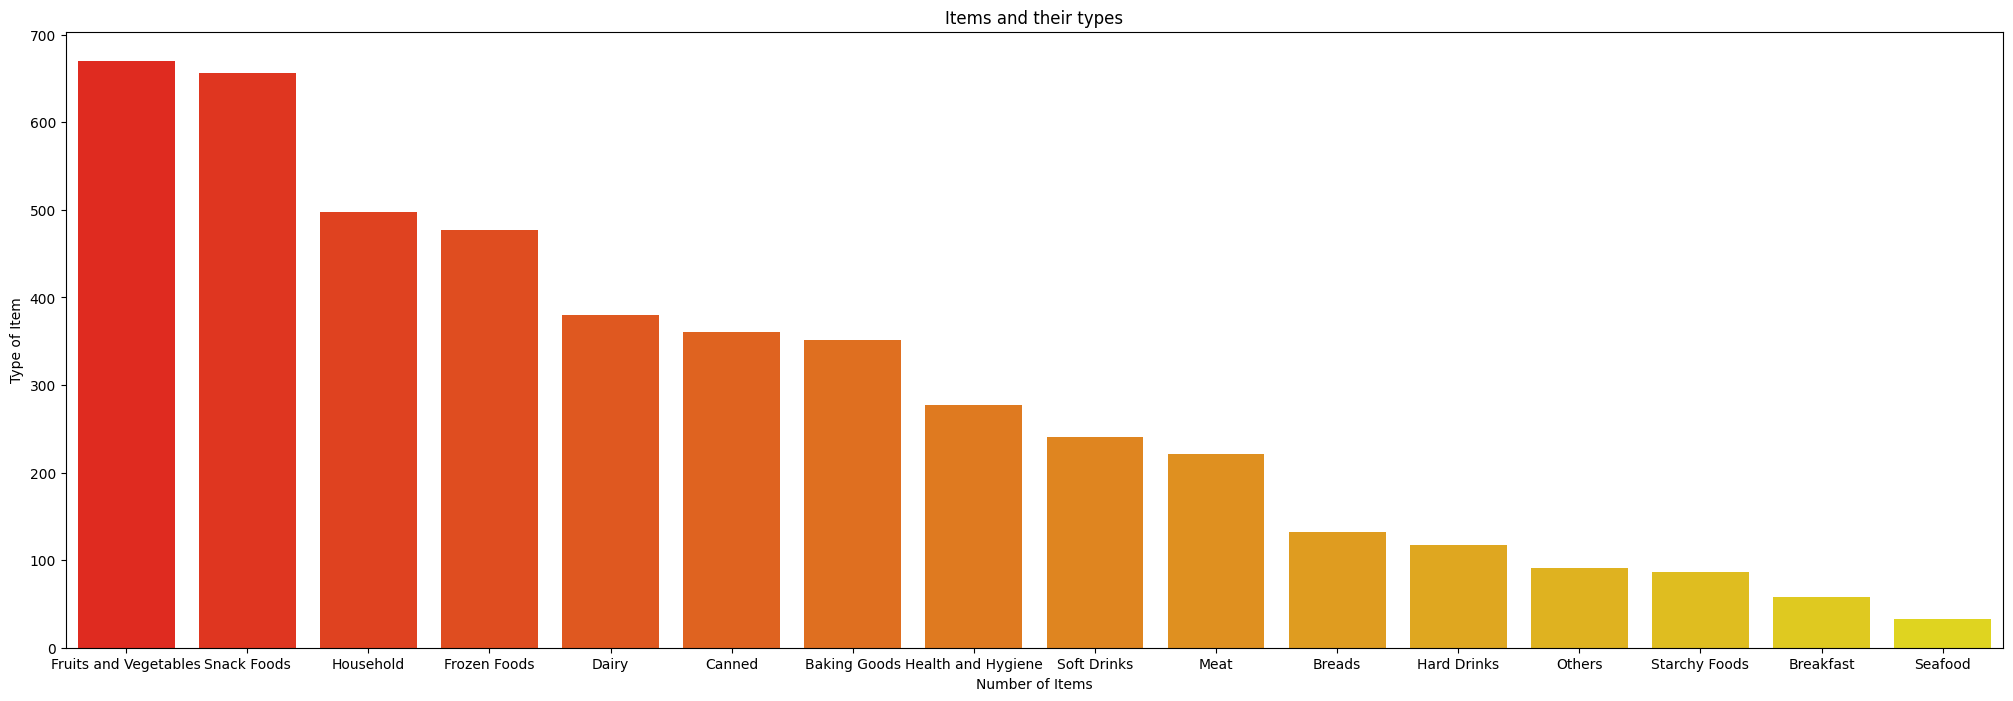

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(data=item_type_count, x='Item_Type', y='Number_Of_Items', palette='autumn')
plt.ylabel("Type of Item")
plt.xlabel("Number of Items")
plt.title("Items and their types")
plt.show()

Tier 1    1860
Tier 3    1860
Tier 2     930
Name: Outlet_Location_Type, dtype: int64

Tier 1    0.4
Tier 3    0.4
Tier 2    0.2
Name: Outlet_Location_Type, dtype: float64

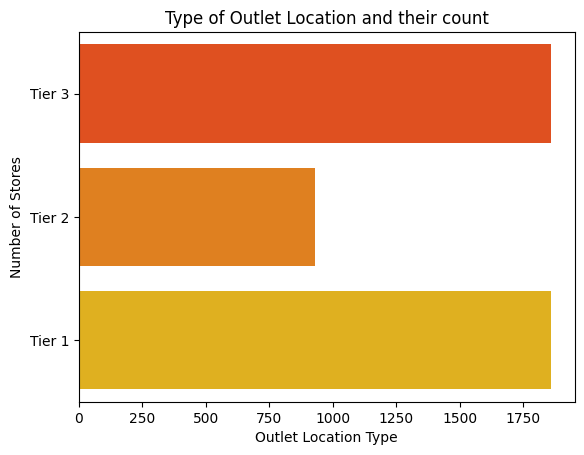

In [ ]:
display(data['Outlet_Location_Type'].value_counts())
print("\n")
display(data['Outlet_Location_Type'].value_counts(normalize=True).round(2))
sns.countplot(data=data.sort_values(by='Outlet_Location_Type',ascending=False), y='Outlet_Location_Type', palette='autumn', orient='h')
plt.xlabel("Outlet Location Type")
plt.ylabel("Number of Stores")
plt.title("Type of Outlet Location and their count")
plt.show()

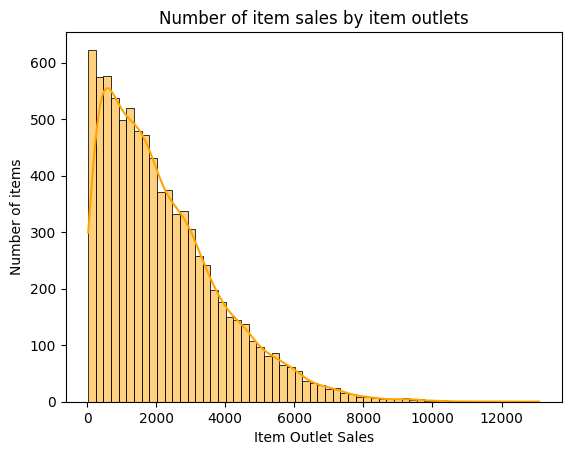

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
1230.3984    14
1416.8224    13
539.2980     12
759.0120     12
1211.7560    12
Name: Item_Outlet_Sales, dtype: int64

3315.6840    1
1132.5258    1
862.2110     1
51.9324      1
2778.3834    1
Name: Item_Outlet_Sales, dtype: int64

In [ ]:
sns.histplot(data=train_data, x=train_data.Item_Outlet_Sales, kde=True, color='orange')
plt.xlabel("Item Outlet Sales")
plt.ylabel("Number of items")
plt.title("Number of item sales by item outlets")
plt.show()
display(train_data['Item_Outlet_Sales'].value_counts().sort_values(ascending=False).head(10))
print("\n")
display(train_data['Item_Outlet_Sales'].value_counts().sort_values(ascending=False).tail(5))


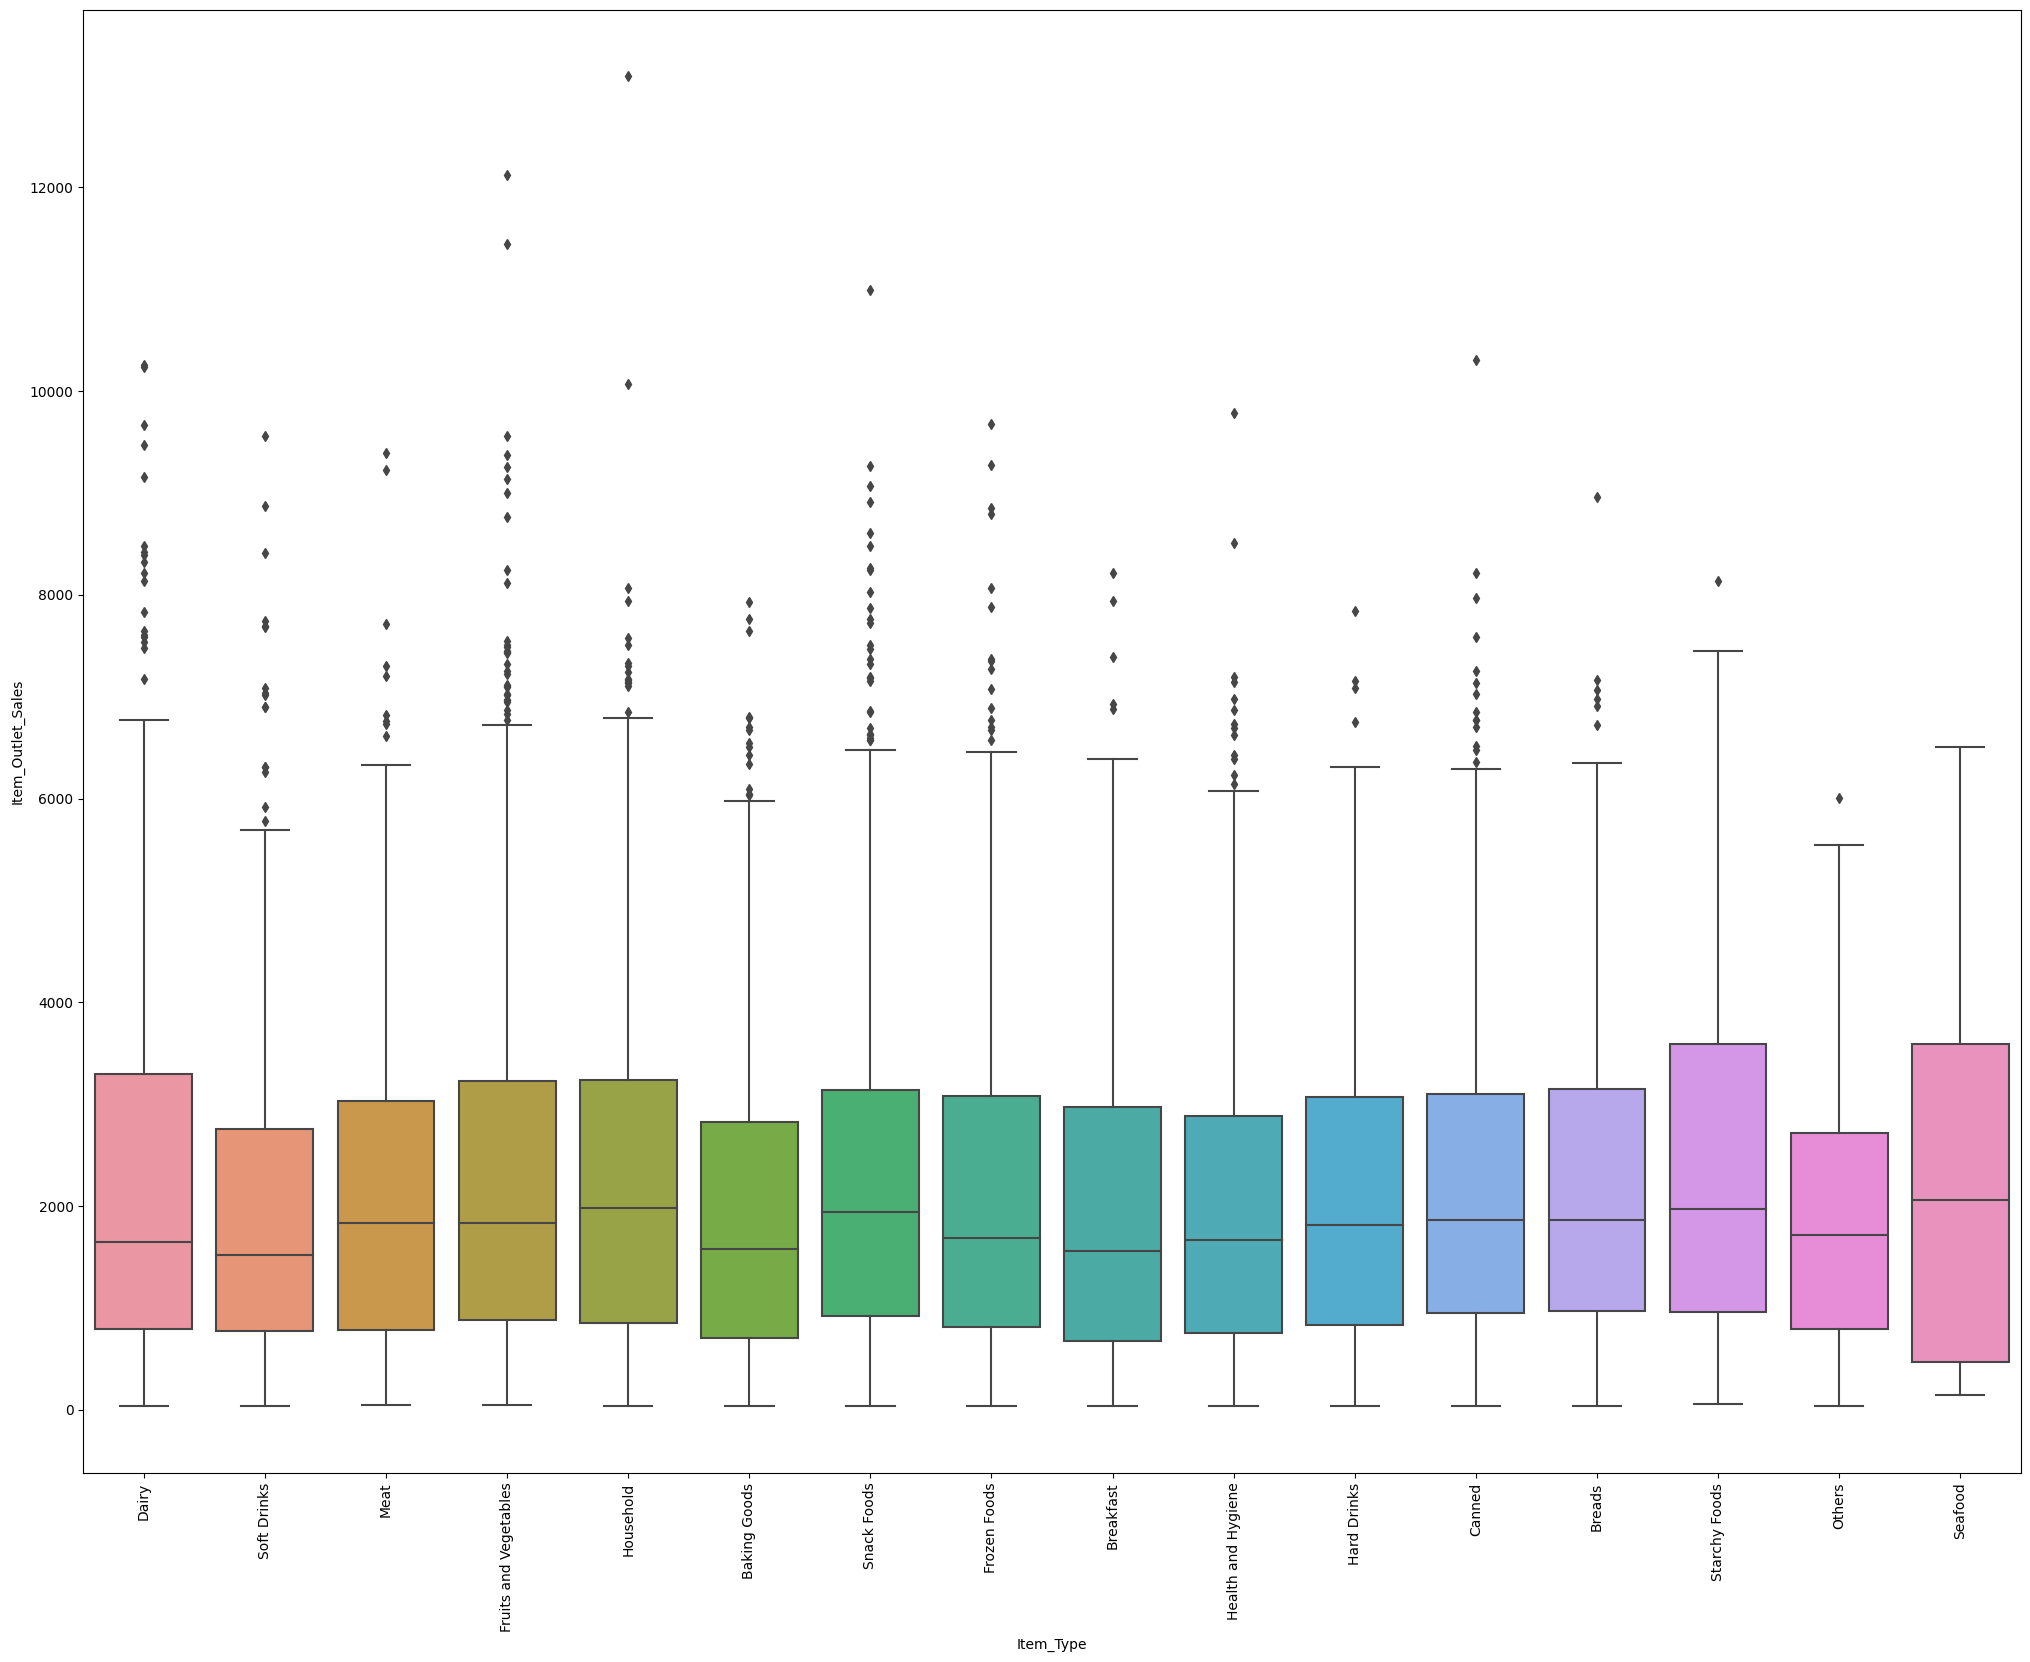

In [ ]:
plt.figure(figsize=(25,19))
sns.boxplot(data=train_data, x='Item_Type', y='Item_Outlet_Sales')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
train_data_dropped = train_data.dropna(subset=['Item_Weight','Outlet_Size'])
train_data_dropped.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encodingColumns = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
onh = OneHotEncoder()
encoded = onh.fit_transform(data[encodingColumns]).toarray()
display(onh.get_feature_names_out())
encoded

array(['Item_Fat_Content_LF', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat',
       'Item_Fat_Content_reg', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2'], dtype=object)

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [ ]:
data_encoded = pd.DataFrame(encoded, columns=onh.get_feature_names_out(encodingColumns))
data_final = pd.concat([data, data_encoded], axis=1)
data_final.drop(columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'], inplace=True)
data_final

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,FDA15,9.300,0.016047,249.8092,OUT049,1999.0,3735.1380,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,DRC01,5.920,0.019278,48.2692,OUT018,2009.0,443.4228,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,FDN15,17.500,0.016760,141.6180,OUT049,1999.0,2097.2700,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,NCD19,8.930,0.000000,53.8614,OUT013,1987.0,994.7052,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5,FDP36,10.395,0.000000,51.4008,OUT018,2009.0,556.6088,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
data_final[data_final.isnull()]

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see there many NaN values in the dataset.

In [ ]:
data_final.dropna(inplace=True)

In [ ]:
data_final.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,FDA15,9.300,0.016047,249.8092,OUT049,1999.0,3735.1380,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,DRC01,5.920,0.019278,48.2692,OUT018,2009.0,443.4228,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,FDN15,17.500,0.016760,141.6180,OUT049,1999.0,2097.2700,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,NCD19,8.930,0.000000,53.8614,OUT013,1987.0,994.7052,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5,FDP36,10.395,0.000000,51.4008,OUT018,2009.0,556.6088,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


Now, our data is clean

In [ ]:
data_final.columns.tolist()

['Item_Identifier',
 'Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales',
 'Item_Fat_Content_LF',
 'Item_Fat_Content_Low Fat',
 'Item_Fat_Content_Regular',
 'Item_Fat_Content_low fat',
 'Item_Fat_Content_reg',
 'Item_Type_Baking Goods',
 'Item_Type_Breads',
 'Item_Type_Breakfast',
 'Item_Type_Canned',
 'Item_Type_Dairy',
 'Item_Type_Frozen Foods',
 'Item_Type_Fruits and Vegetables',
 'Item_Type_Hard Drinks',
 'Item_Type_Health and Hygiene',
 'Item_Type_Household',
 'Item_Type_Meat',
 'Item_Type_Others',
 'Item_Type_Seafood',
 'Item_Type_Snack Foods',
 'Item_Type_Soft Drinks',
 'Item_Type_Starchy Foods',
 'Outlet_Size_High',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2']

### Preparing Data for Modelling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = data_final.drop(columns=['Item_Identifier','Outlet_Identifier'])
y = data_final['Item_Outlet_Sales']
scaler = StandardScaler()
X_array = scaler.fit_transform(X)
X_df = pd.DataFrame(X_array, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2 , random_state=123)

<ipython-input-29-9852b8408bae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=train_data.corr(), annot=True, cmap='Blues')


<Axes: >

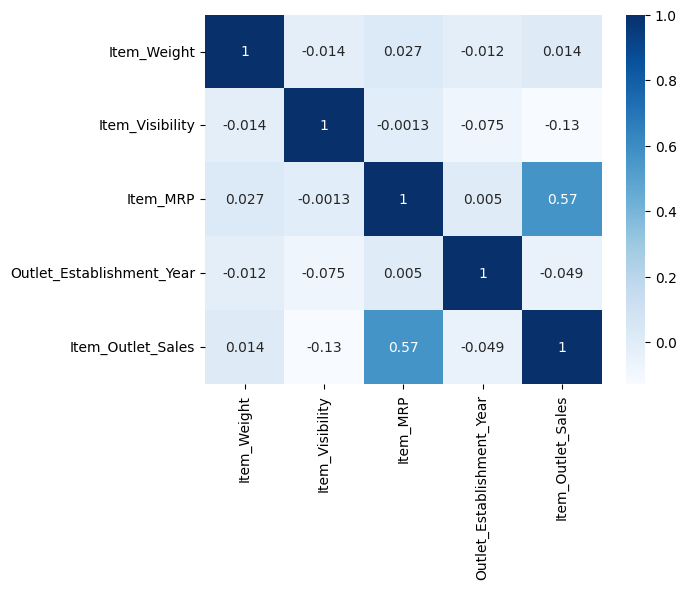

In [ ]:
sns.heatmap(data=train_data.corr(), annot=True, cmap='Blues')

### Making Prediction

In [ ]:
linr = LinearRegression()
rf = RandomForestRegressor()

In [ ]:
algorithms = {'LinearRegression':linr,'RandomForestRegressor':rf}
for keys, values in algorithms.items():
    values.fit(X_train, y_train)
    y_pred = values.predict(X_test)
    print(f"The accuracy score for the algorithm {keys} is: {values.score(X_test,y_test).round(5)}")

The accuracy score for the algorithm LinearRegression is: 1.0
The accuracy score for the algorithm RandomForestRegressor is: 0.99994


### Conclusion - Hence, the best model for the fitting was random forest regressor. It gave us a score of 0.999935 on the training dataset. Even if Linear Regression give us the accuracy of 1.

# **--------------------------------------------Thank You--------------------------------------------**